In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import  matplotlib.pyplot as plt
import numpy as np

In [25]:
student_info = pd.read_csv("C:/Users/USER/Desktop/AI/student_dataset/student/student-mat.csv", delimiter=";")
print(student_info)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [26]:
corr = student_info.corr().abs().sort_values(by=['G1', 'G2', 'G3'], ascending=False)
display(corr[corr>=0.55])

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
G1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.852118,0.801468
G2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.852118,1.000000,0.904868
G3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.801468,0.904868,1.000000
failures,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,NaN,1.000000,0.623455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fedu,NaN,0.623455,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studytime,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goout,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Walc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.647544,1.000000,NaN,NaN,NaN,NaN,NaN
Dalc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.647544,NaN,NaN,NaN,NaN,NaN


In [27]:
# data predictors
prediction_columns = ['G1', 'G2']
X = pd.DataFrame(data=student_info, columns=prediction_columns)

print(X)

     G1  G2
0     5   6
1     5   5
2     7   8
3    15  14
4     6  10
..   ..  ..
390   9   9
391  14  16
392  10   8
393  11  12
394   8   9

[395 rows x 2 columns]


In [28]:
# data response
response_columns = ['G3']
y = pd.DataFrame(data=student_info, columns=response_columns)

print(y)

     G3
0     6
1     6
2    10
3    15
4    10
..   ..
390   9
391  16
392   7
393  10
394   9

[395 rows x 1 columns]


In [29]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # 25% test data

In [30]:
# create model
model = linear_model.LinearRegression()
result = model.fit(X_train, y_train)

In [31]:
# predicting the test set
y_pred = model.predict(X_test)

In [32]:
# check the difference betweeb the actual value and predicted value
df_out = pd.merge(X_test, y_test,how='left', left_index=True, right_index=True)
df_out['Prediction'] = y_pred
display(df_out)

,G1,G2,G3,Prediction
80,10,12,12,11.489715
55,8,9,10,8.206738
255,7,9,8,8.024637
102,10,13,14,12.462640
7,6,5,6,3.950835
...,...,...,...,...
327,11,10,10,9.725964
245,18,18,18,18.784072
133,12,11,11,10.880990
161,5,9,7,7.660436


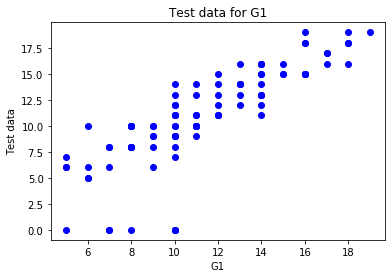

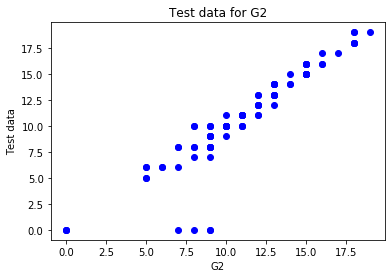

In [39]:
# Test data output
for i in X_test:
    plt.scatter(X_test[i], y_test,  color='blue')
    plt.title(f'Test data for {i}')
    plt.xlabel(f"{i}")
    plt.ylabel("Test data")
    plt.show()

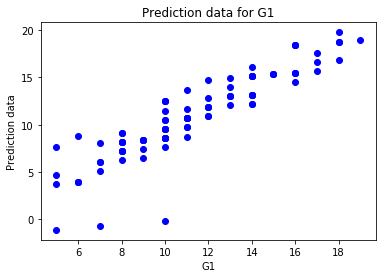

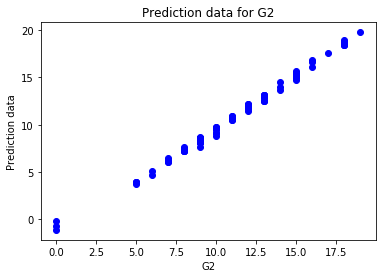

In [40]:
# Prediction data output
for i in X_test:
    plt.scatter(X_test[i], y_pred,  color='blue')
    plt.title(f'Prediction data for {i}')
    plt.xlabel(f"{i}")
    plt.ylabel("Prediction data")
    plt.show()